# Flower Classification

## Creating Paths And Directories

In [5]:
# All Imports
import os, shutil
import matplotlib.pyplot as plt
import numpy as np
from keras.preprocessing.image import ImageDataGenerator


In [6]:
# This is origional directory path of folder where all datasets resides 
original_dataset_dir = 'your_dir_path'

# This is base directory where we will store our data for processing
base_dir = os.path.join(original_dataset_dir,"flowers-model")

# Creating base directory
if not os.path.exists(base_dir):
    os.mkdir(base_dir)
    
# This is folder where all data will be placed
flowers = os.path.join(original_dataset_dir,"flowers")
# This is train data directory path
train_dir = os.path.join(base_dir,"train")
# This is test data directory path
test_dir = os.path.join(base_dir,"test")
# This is validation data directory path
val_dir = os.path.join(base_dir,"val")

if not os.path.exists(train_dir):
    os.mkdir(train_dir)

if not os.path.exists(test_dir):
    os.mkdir(test_dir)
    
if not os.path.exists(val_dir):
    os.mkdir(val_dir)

## Sample Images From Each Class

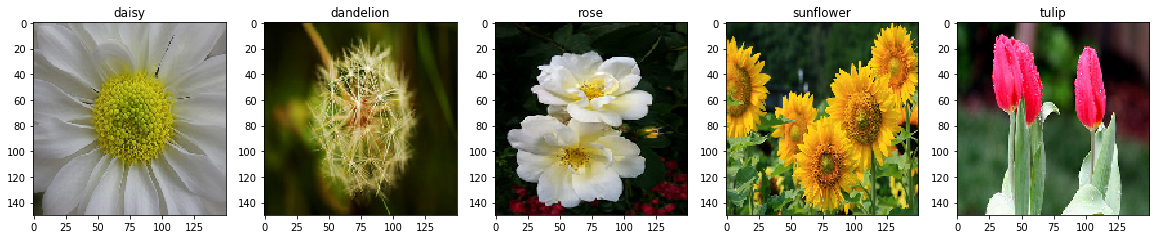

In [8]:
from keras.preprocessing.image import load_img
classes = os.listdir(flowers)
one_instance_of_each_class = []

for eachclass in classes:
    instances_path = os.path.join(flowers,eachclass)
    instances = os.listdir(instances_path)
    one_instance = instances[0]
    path_one_instance = os.path.join(instances_path,one_instance)
    tmp = [eachclass,path_one_instance]
    one_instance_of_each_class.append(tmp)

#  class name , first instance path
#  one_instance_of_each_class[0] - > [class name[0] , first instance path[0]]
    
width=150
height=150
depth = 3

fig=plt.figure(figsize=(20, 5))
columns = 5
rows = 1

# for i in range(1, columns*rows +1):
for i in range(1, len(one_instance_of_each_class)+1):
    img = load_img(one_instance_of_each_class[i-1][1], target_size=(width,height,depth))
    fig.add_subplot(rows, columns, i)
    plt.title(one_instance_of_each_class[i-1][0])
    plt.imshow(img)
    
plt.show()

## Visualizing Dataset

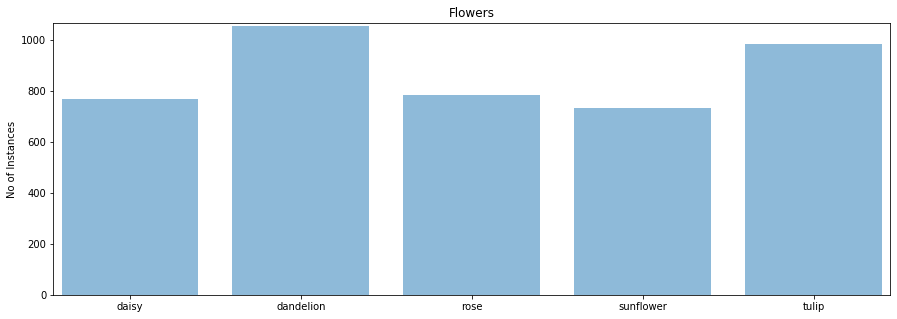

In [9]:
plt.figure(figsize=(15,5))
plt.margins(0.01)

classes = os.listdir(flowers)
pos = np.arange(len(classes))
instances = []
for eachclass in classes:
    instance_path = os.path.join(flowers,eachclass)
    instances.append(len(os.listdir(instance_path)))
    
plt.bar(pos, instances, align='center', alpha=0.5)
plt.xticks(pos, classes,fontsize=10)
plt.ylabel('No of Instances')
plt.title('Flowers')

plt.show()

## Comments

In [10]:
# Dataset is imbalance so classifier may be baised towards dandelion or tulip

## Train / Test Split

In [ ]:
# Listing directory of train files
directories = os.listdir(flowers)
# Getting folder name of each class
for eachclass in directories:
    train_classes = os.path.join(train_dir,eachclass)
    test_classes = os.path.join(test_dir,eachclass)
    val_classes = os.path.join(val_dir,eachclass)
    
    # Creating folder in all_data directory 
    if not os.path.exists(train_classes):
        os.mkdir(train_classes)
        
        # Creating folder in all_data directory 
    if not os.path.exists(test_classes):
        os.mkdir(test_classes)
        
        # Creating folder in all_data directory 
    if not os.path.exists(val_classes):
        os.mkdir(val_classes)
        
        
        
    src_dir_path = os.path.join(flowers,eachclass)
    instances = os.listdir(src_dir_path)
    instances_len = len(instances)
    instance_no = 0
    # Here we will copy each instance from train directory and paste it in all_data directory in corresponding class 
    for instance in instances:
        src = os.path.join(src_dir_path,instance)
        dst=""
        
        instance_no += 1
        
        if instance_no < (instances_len*0.7):
            dst = os.path.join(train_classes,instance)
        elif instance_no < (instances_len * .85):
            dst = os.path.join(test_classes,instance)
        else:
            dst = os.path.join(val_classes,instance)
        
        shutil.copyfile(src,dst)

## Achitecture Design

In [14]:
# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=60,
        # Since we use categorical_crossentropy loss, we need categorical labels
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        val_dir,
        target_size=(150, 150),
        batch_size=60,
        class_mode='categorical')

Found 3025 images belonging to 5 classes.
Found 649 images belonging to 5 classes.


In [15]:
from keras import layers
from keras import models
from keras import optimizers

model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))

model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))

model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))

model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())

model.add(layers.Dropout(0.5))

model.add(layers.Dense(512, activation='relu'))

model.add(layers.Dense(5, activation='softmax'))

model.summary()






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
______________________

## Compiling Model

In [16]:
model.compile(loss='categorical_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4),metrics=['acc'])

## Model Fitting

In [17]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=5,
      validation_data=validation_generator,
      validation_steps=50)

model.save('flowers_classification.h5')

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/5





100/100 [==============================] - 606s 6s/step - loss: 1.3498 - acc: 0.4024 - val_loss: 1.1754 - val_acc: 0.5223
Epoch 2/5
100/100 [==============================] - 616s 6s/step - loss: 1.1405 - acc: 0.5213 - val_loss: 1.0773 - val_acc: 0.5487
Epoch 3/5
100/100 [==============================] - 571s 6s/step - loss: 1.0557 - acc: 0.5706 - val_loss: 1.3315 - val_acc: 0.4411
Epoch 4/5
100/100 [==============================] - 598s 6s/step - loss: 0.9841 - acc: 0.6128 - val_loss: 0.9849 - val_acc: 0.6248
Epoch 5/5
100/100 [==============================] - 590s 6s/step - loss: 0.9294 - acc: 0.6416 - val_loss: 1.0441 - val_acc: 0.5869


## Model acc / loss Graph

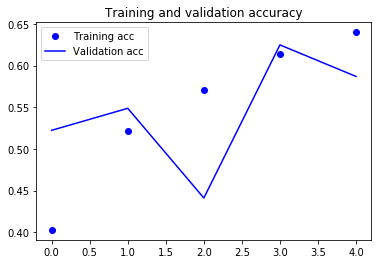

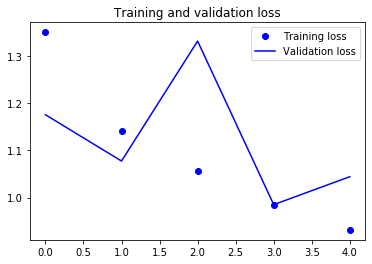

In [18]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()



## Predicting Random Image

daisy


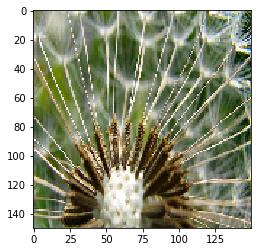

In [19]:
from keras.models import load_model
from keras.preprocessing.image import load_img
import numpy as np


classifier = load_model('flowers_classification.h5')

classes = os.listdir(test_dir)

images_path = os.path.join(test_dir,classes[1])

images = os.listdir(images_path)

image_path = os.path.join(images_path, images[0])

sample = load_img(image_path, target_size=(150,150,3))

plt.imshow(sample)

sample = np.expand_dims(sample, axis=0)

prediction = classifier.predict(sample)

print(classes[np.argmax(prediction)])